<a href="https://colab.research.google.com/github/SamuelMiller413/Coding-Nomads-Deep-Learning-Miniproject-1/blob/master/dl_miniproject_1_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Intrdouction
---

## Problem Statement:
> An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

>In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

>You are required to help the manager to predict the right group of the new customers.

## Resources
>Data    (from Kaggle)
* [Customer Segmentation Dataset](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation?select=train.csv) 

> Notebooks of Influence
* [Janatahack](https://www.kaggle.com/code/abisheksudarshan/av-janatahack-customer-segmentation/data) 
* [Seun Ayegboyin](https://www.kaggle.com/code/seunayegboyin/customer-segmentation-with-kmeans-and-pca) (PCA/Clustering)

---
# Work Flow
---

### NOTES
* Write 
        def grep()
        def greps_all()
* OHE all
* Impute NaN
* Train Models
* Train DL Models


### Workflow Outline

---
#### 1. Pre-Training
---
* Setup
    * Data Loading
    * Download the Dataset
    * Split Data
    * Custom Functions
* Initial EDA / Data Visualization
* Feature Engineering and Transformation
* Continued EDA / Data Visualization
* Pipelines
<br>
---
#### 2. Training
---
* Traditional ML Modeling
* Pure Torch Model
* High-level Libraries and Tabular Frameworks
<br>
---
#### 3. Testing
---
* Model Selection and Test Set Evaluation
* Notes and Findings



---
# 1. Pre-Training
---
* Setup
    * Data Loading
    * Download the Dataset
    * Split Data
    * Custom Functions
* Initial EDA / Data Visualization
* Feature Engineering and Transformation
* Continued EDA / Data Visualization
* Pipelines

## Setup

#### Retrieval and Cloud Connection

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# upload 'kaggle.json'
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"samuelmiller413","key":"d635e1518efc064bb478bb67bb2c22aa"}'}

In [3]:
# make kaggle directory 
! mkdir ~/.kaggle
# store JSON
! cp kaggle.json ~/.kaggle/
# change permissions
! chmod 600 ~/.kaggle/kaggle.json

# download data from kaggle
! kaggle datasets download -d 'abisheksudarshan/customer-segmentation'
# make directory for data
! mkdir customer-segmentation

# unzip into directory
! cd.. customer-segmentation/
! unzip customer-segmentation.zip -d customer-segmentation/
# remove .zip
! rm -r customer-segmentation.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/98.7k [00:00<?, ?B/s]
100% 98.7k/98.7k [00:00<00:00, 56.6MB/s]
mkdir: cannot create directory ‘customer-segmentation’: File exists
/bin/bash: cd..: command not found
Archive:  customer-segmentation.zip
replace customer-segmentation/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace customer-segmentation/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


#### Imports

In [4]:
%%capture
# import libraries
import numpy as np 
import pandas as pd 
import pprint
import inspect

# PRE-PROCESSING                                                                          
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import CategoricalImputer

# FEATURE SELECTION                                                                          
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, RFE, RFECV

# PIPELINE                                     
from sklearn.pipeline import Pipeline
                                          
# NEURAL NETWORK                                                   
from sklearn.neural_network import MLPRegressor

# CROSS VALIDATION
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.model_selection import KFold, RandomizedSearchCV

# EVALUATION
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import SCORERS

# PLOTTING
# from plotting import plot_learning_curve, plot_validation_curve
import random
import matplotlib.pyplot as plt
import seaborn as sns

# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

#### Download Dataset

In [5]:
csv_train = '/content/customer-segmentation/train.csv'
csv_test = '/content/customer-segmentation/test.csv'

#### Split Data

In [6]:
# > data is pre-split into two files <
# read split data
train = pd.read_csv(csv_train)
test = pd.read_csv(csv_test)
# meta encode whether df is 'train'
train['train_y_n']=1
test['train_y_n']=0
# make full df
full_df = pd.concat([train, test])

In [7]:
# mini dataframes
comp_df1 = full_df.loc[full_df['train_y_n'] == 1].head()
comp_df2 = full_df.loc[full_df['train_y_n'] == 0].tail()
comps_df = pd.concat([comp_df1, comp_df2])
# list dfs and verify their datatype
df_dict = {'train':train, 'test':test, 'full_df':full_df, 'comp_df1':comp_df1, 'comp_df2':comp_df2, 'comps_df':comps_df}
print([type(v) for k,v in df_dict.items()])

[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


In [8]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,train_y_n
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [9]:
# drop 'ID' & 'Var_1' columns
train = train.drop('ID', axis=1)
train = train.drop('Var_1', axis=1)
# split into features_cols
feature_cols = train.columns.tolist()
feature_cols.remove('Segmentation')
feature_cols.remove('train_y_n')
# label
label_col = 'Segmentation'
print(feature_cols)
print(label_col)

['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size']
Segmentation


In [10]:
# scoping the dataframes --> shapes, sizes, samples
# shapes
print('\n---\nShapes\n---\n')
[print(f"{k.upper()} : {v.shape}\n") for k,v in df_dict.items()]
print("\n=====================\n")
# columns
print('\n---\nColumns\n---\n')
[print(f"\n---\n{k.upper()} Columns: \n---\n\n{v.columns}\n") for k,v in df_dict.items()]
print("\n=====================\n")
# samples
print("\n---\nSamples\n---\n")
[print(f"\n---\n{k.upper()} Samples: \n---\n\n{v.sample(5)}\n\n\n") for k,v in df_dict.items()]


---
Shapes
---

TRAIN : (8068, 12)

TEST : (2627, 11)

FULL_DF : (10695, 12)

COMP_DF1 : (5, 12)

COMP_DF2 : (5, 12)

COMPS_DF : (10, 12)




---
Columns
---


---
TRAIN Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'train_y_n'],
      dtype='object')


---
TEST Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'train_y_n'],
      dtype='object')


---
FULL_DF Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'train_y_n'],
      dtype='object')


---
COMP_DF1 Columns: 
---

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
    

[None, None, None, None, None, None]

## Functions

### Retrieve Variable Name

In [11]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
    # above code --> https://stackoverflow.com/questions/18425225/getting-the-name-of-a-variable-as-a-string
                            # user: scohe001

### Summarize

In [12]:
def summarize(subset=train):
    '''
    Doc:
    Summarizes EDA for Pandas dataframe.

        Parameters
        -------------
            subset      : (dataframe)
                Specify the dataframe or subset of dataframe to summarize
                    default: 'train'
        Returns
        -------------
            Summary functions from those stored in eda_summary
    '''
    # initialize summary dict
    eda_summary_att = {
        'shape':subset.shape, 
        'isnull':subset.isnull,
        'dtypes':subset.dtypes
        }
    eda_summary_func = { 
        'info':subset.info,     
        'describe':subset.describe(),
        'corr':subset.corr(),
        'value_counts':subset.value_counts()
        }
    # display name of subset
    print(f"\nSummary of Subset:  '{retrieve_name(subset)[0]}'\n")
    # loop through and call each summary function
    for k,v in eda_summary_att.items():
        if k == 'isnull':
            v = eda_summary_att[k]().sum()
            print(f"\n--------\n{k.upper()}\n--------\n\n{v}\n---")    
        else:
            # summary = subset.v()
            print(f"\n--------\n{k.upper()}\n--------\n\n{v}\n---")
    for k,v in eda_summary_func.items():
        if k == 'value_counts':
            for i in range(1,(len(subset.columns)-1)):
                by_feature = subset[subset.columns[i]]
                print(by_feature.value_counts())

        else:
            print(f"\n--------\n{k.upper()}\n--------\n\n{v}\n---")

### Data Viz

In [13]:
# set target variable
target = 'segmentation'          # <--- needs scaling
sizes = {'s':((10,6)),'m':(14,8), 'l':(18,10)}

In [14]:
# initialize plotting dict
graph_ = {
    'relplot': sns.relplot,
    'scatterplot': sns.scatterplot,
    'lineplot': sns.lineplot,
    'displot': sns.displot,
    'histplot': sns.histplot,
    'kdeplot': sns.kdeplot,
    'ecdfplot': sns.ecdfplot,
    'rugplot': sns.rugplot,
    'catplot': sns.catplot,
    'stripplot': sns.stripplot,
    'swarmplot': sns.swarmplot,
    'boxplot': sns.boxplot,
    'violinplot': sns.violinplot,
    'boxenplot': sns.boxenplot,
    'pointplot': sns.pointplot,
    'barplot': sns.barplot,
    'countplot': sns.countplot,
    'lmplot':' sns.lmplot',
    'regplot': 'sns.regplot',
    'residplot': 'sns.residplot',
    'heatmap': 'sns.heatmap',
    'clustermap': 'sns.clustermap',
    'FacetGrid': 'sns.FacetGrid',
    'pairplot': 'sns.pairplot',
    'PairGrid': 'sns.PairGrid',
    'jointplot': 'sns.jointplot',
    'JointGrid': sns.JointGrid
    }
def plot_grep(feature, label=target, plot_type='countplot', fig_size='s',subset=train): 
    '''
    Doc:
    Greps feature with label.
    Displays a seaborn plot of grep.

        Parameters
        -------------
            feature   : (str)
                Feature to plot 'label' by
            label     : (str)    
                Label (or additional feature) to plot 'feature' by  
                default   = target
                    * save a variable 'target' as df.columns['target variable']               
            plot_type : (dict)
                Specify a seaborn plot function from {graph_}
                    default: 'countplot'      
            fig_size  : {'s', 'm', 'l'}
                Choose a small , medium, or large figure size
                default   : {'s'=10x6, 'm'=14x8, 'l'=18x10}
            subset    : (dataframe)
                Specify which subset of the dataframe to use
                default   = 'train'
                examples  : 'train', 'test','all', etc.
        
        Returns
        -------------
            Seaborn plot of grep(feature,label)

        Plot Options: 
        -------------
        --> from Seaborn API Reference : https://seaborn.pydata.org/api.html
        
        Relational Plots
        ---
        'relplot'     - Figure-level interface for drawing relational plots onto a FacetGrid.
        'scatterplot' - Draw a scatter plot with possibility of several semantic groupings.
        'lineplot'    - Draw a line plot with possibility of several semantic groupings.

        Distribution Plots
        ---
        'displot'     - Figure-level interface for drawing distribution plots onto a FacetGrid.
        'histplot'    - Plot univariate or bivariate histograms to show distributions of datasets.
        'kdeplot'     - Plot univariate or bivariate distributions using kernel density estimation.

        Categorical Plots
        ---
        'ecdfplot'    - Plot empirical cumulative distribution functions.
        'rugplot'     - Plot marginal distributions by drawing ticks along the x and y axes.
        'catplot'     - Figure-level interface for drawing categorical plots onto a FacetGrid.
        'stripplot'   - Draw a scatterplot where one variable is categorical.
        'swarmplot'   - Draw a categorical scatterplot with non-overlapping points.
        'boxplot'     - Draw a box plot to show distributions with respect to categories.
        'violinplot'  - Draw a combination of boxplot and kernel density estimate.
        'boxenplot'   - Draw an enhanced box plot for larger datasets
        'pointplot'   - Show point estimates and confidence intervals using scatter plot glyphs.
        'barplot'     - Show point estimates and confidence intervals as rectangular bars.
        'countplot'   - Show the counts of observations in each categorical bin using bars.

        Regression Plots
        ---
        'lmplot'      - Plot data and regression model fits across a FacetGrid.
        'regplot'     - Plot data and a linear regression model fit.
        'residplot'   - lot the residuals of a linear regression.

        Matrix Plots
        ---
        'heatmap'     - Plot rectangular data as a color-encoded matrix.
        'clustermap'  - Plot a matrix dataset as a hierarchically-clustered heatmap.

        MULTI-PLOT GRIDS

        FacetGrid
        ---
        'FacetGrid'   - Multi-plot grid for plotting conditional relationships.

        Pair Grids
        ---
        'pairplot'    - Plot pairwise relationships in a dataset.
        'PairGrid'    - Subplot grid for plotting pairwise relationships in a dataset.

        Joint 'Grids'
        ---
        'jointplot'   - Draw a plot of two variables with bivariate and univariate graphs.
        'JointGrid'   - Grid for drawing a bivariate plot with marginal univariate plots.
    '''
    # filter input for matching 
    feature = feature.title()
    label = label.title()
    # increase size for age
    if (feature == 'Age') & (fig_size == 's'):
        aging = True
        while aging == True:
            resp = input(f'This {feature} feature has quite the range!\n\
            Would you like to increase the size for better readability?\n\n(y) or (n)   --> ')
            if resp.lower() == 'n':
                print("You know best!")
                aging = False
            else:               # resp.lower() == 'y': 
                print("Great idea!")
                fig_size = 'm'
                aging = False   
    # plot
    fig, ax = plt.subplots(figsize=sizes[fig_size])
    graph_[plot_type](subset[feature],hue=subset[label])
    plt.show() 

def plot_all_grep(feature, plot_type='countplot', fig_size='s',subset=train): 
    '''
    **WRITE DOC**
    '''
    # filter input for matching 
    feature = feature.title()
    # label = label.title()
    # increase size for age
    for i in range(1,(len(subset.columns)-1)):
        by_feature = subset[subset.columns[i]]
        if (subset.columns[i] == 'Age') & (fig_size == 's'):
            # plot
            fig, ax = plt.subplots(figsize=sizes['m'])
            graph_[plot_type](by_feature,hue=subset[feature])
            plt.show() 
        else:
            # plot
            fig, ax = plt.subplots(figsize=sizes[fig_size])
            graph_[plot_type](by_feature,hue=subset[feature])
            plt.show() 

In [15]:
# Notes for later:
# program a function that takes the correlations that a heatmap would show, 
# but prints grep graphs for each significant pairing:
#   display corr for corr in corr_list if corr_val ≥ .5

### Impute

In [16]:
def fill_nan(subset=None):
    '''
    ** Write DOC ***
    '''
    imputer = CategoricalImputer()
    nan_list = []
    null_count = subset.isnull().any()
    for i in range(1,len(subset.columns)-1):
        if null_count[i] == True:
            nan_list.append(subset.columns[i])
        else:
            pass
    for feature in nan_list:
        # impute NaN values
        filled = imputer.fit_transform(np.array(subset[feature], dtype=object))
        # update subset
        subset[feature] = filled
    return subset
    # scratch
        # train_copy =pd.read_csv(csv_train)
        # print("\n\n=======\n")
        # print("\ntrain_copy before\n")
        # print(train_copy.isnull().sum())
        # fill_nan(train_copy)
        # print("\n\n=======\n")
        # print("\ntrain_copy after\n")
        # print(train_copy.isnull().sum())
        # print("\n\n=======\n\n")
        # print("\ntrain\n")
        # print(train.isnull().sum())    

### OHE
(Needed for further EDA)

In [17]:
def ohe(subset=None):
    # must be run after fillna
    obj_list = [] # move?
    for i in range(0,len(subset.dtypes)):
        if train.dtypes[i] == 'object':
            obj_list.append(subset.columns[i])
            # obj_dict[str(subset.columns[i])] = subset[subset.columns[i]]
        else:
            pass

    print(f"\nOHE of Subset:  '{retrieve_name(subset)[0]}'\n\nColumns Include:")
    [print(f"   {x}") for x in obj_list]
    resp = input("\nProceed with OHE?     y/n \n\n  -->  ")
    if resp == 'n':
        print("\nnevermind then...\n")
    else:
        print("\nLet's do it!\n")
        print(obj_list)
        subset = pd.get_dummies(data=subset, columns=obj_list)
        print("...")
        subset.head()
    return subset

    # scratch
        #     resp = input("\nOne Hot Encoding performed.\nDrop old columns?     y/n \n\n  -->  ")
        #     if resp == 'y':
        #         for i in range(0,len(obj_list)-1):
        #             print(obj_list[i])
        #             subset.drop([obj_list[i]],axis=1,inplace=True) 
        #         print("\nCool, Here's your new dataframe!\n")
        #         subset.head()           
        #     else:
        #         print("\nOkay then.\n")

        # return subset 
        # #         for col in obj_list:
        # #             subset.drop(col,axis=1,inplace=True)
        # #         print("\nCool, Here's your new dataframe!\n")
        # #         subset.head()

        # # for feature in obj_list:
        # #     pd.get_dummies(data=subset, prefix=feature, columns=obj_list)
        # #     subset[name] 
        # #     print(
        # #         subset[feature],
        # #         "ohe'd" 
        # #         )

    # scratch
    # # ohe(comp_df2)
    # obj_list = [] # move?
    # ghost_train = pd.read_csv(csv_train)
    # su = ghost_train
    # for i in range(1,len(su.dtypes)-1):
    #     if train.dtypes[i] == 'object':
    #         obj_list.append(su.columns[i])
    #         # obj_dict[str(subset.columns[i])] = subset[subset.columns[i]]
    # print(obj_list)
    # # pd.get_dummies(comp_df2)

In [18]:
# test ohe
    # su = pd.read_csv(csv_train)
    # su = su.drop('Var_1', axis=1)
    # su = ohe(su)
    # print(su.columns)
    # su_num = su.select_dtypes(exclude=['object'])

### Pipelines

In [19]:
pipes = {}
def add_pipe(pipe, name):
    if name in pipes.keys():
        print(f"A pipe called '{name}' already exists!")
        new_name = input("Enter another name:]")
        pipes[f"{new_name}"] = pipe
        print(f"'{new_name}' added to 'pipes'")
    else:
        pipes[f'{name}'] = pipe
        print(f"'{name}' added to 'pipes'")

### Learning Curves 

In [20]:
def plot_lc(model):
    metrics =  [['MAE', 'neg_mean_absolute_error'],['RMSE','neg_root_mean_squared_error'], ['R2','r2']]
    for i in range(len(metrics)):
        print(f'Scoring Measure: {metrics[i][0]}')
        plot_learning_curve(pipes[model], X_train_sel, y_train, cv=cv, n_jobs=-1, scoring=metrics[i][1])
        plt.show();
       

### Add Scores 

In [21]:
scores = {}
def add_scores(score, model):
    if model in scores.keys():
        print(f"A pipe called '{model}' already exists!")
        new_model = input("Enter another model name :] ")
        scores[f"{new_model}"] = score
        print(f"'{new_model}' added to 'scores'")
    else:
        scores[f'{model}'] = scores
        print(f"'{model}' added to 'scores'")

## Initial EDA & Data Visualization

In [22]:
summarize(train)


Summary of Subset:  'train'


--------
SHAPE
--------

(8068, 10)
---

--------
ISNULL
--------

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
train_y_n            0
dtype: int64
---

--------
DTYPES
--------

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
train_y_n            int64
dtype: object
---

--------
INFO
--------

<bound method DataFrame.info of       Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer

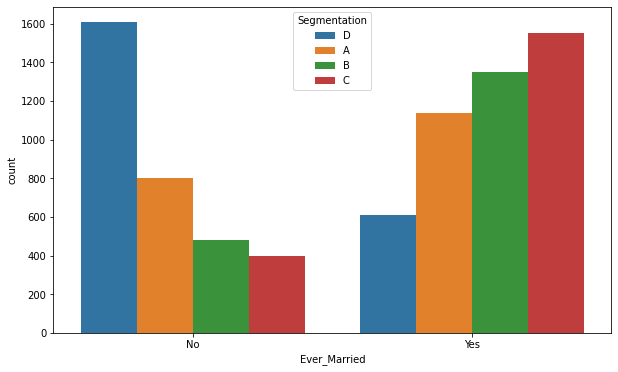

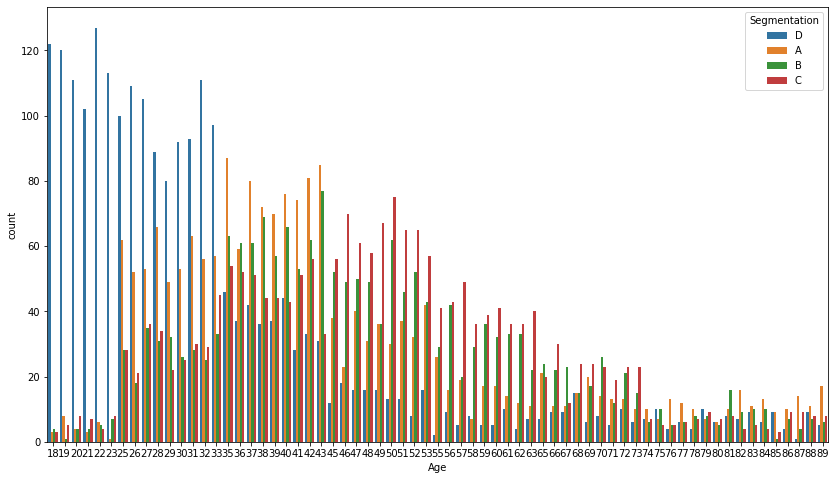

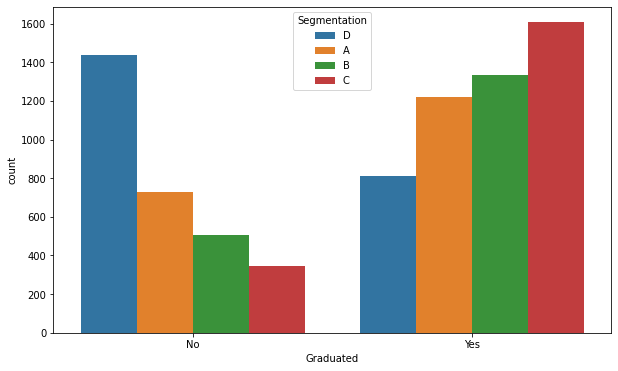

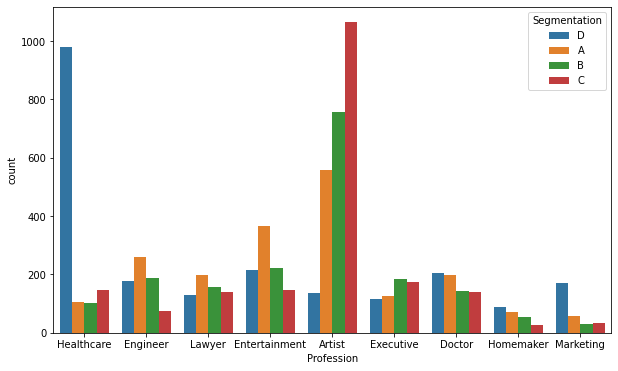

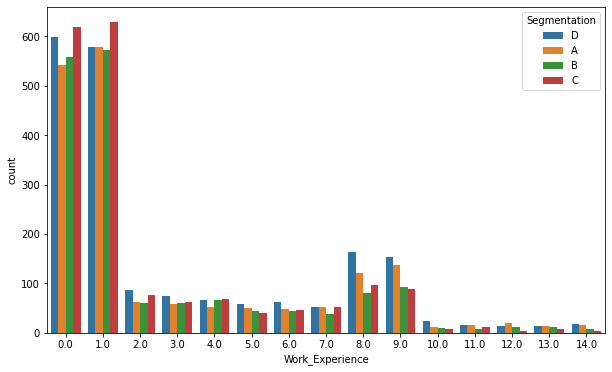

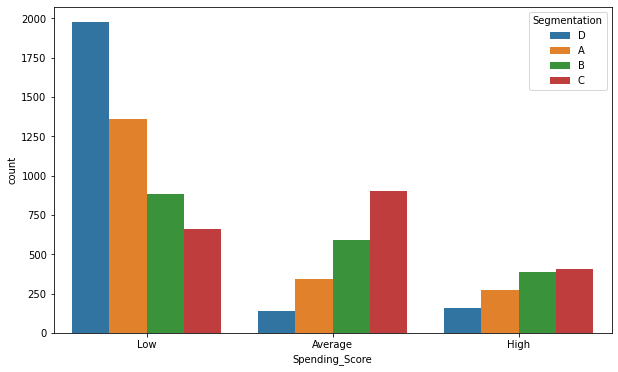

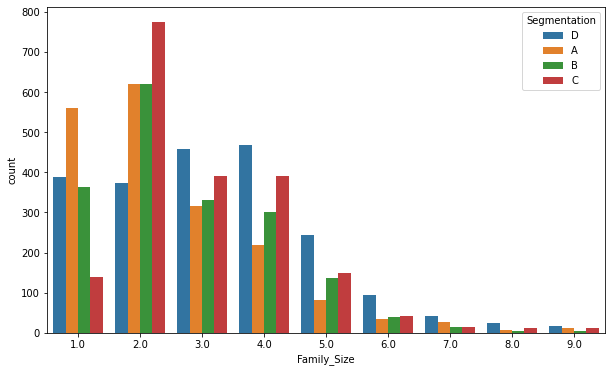

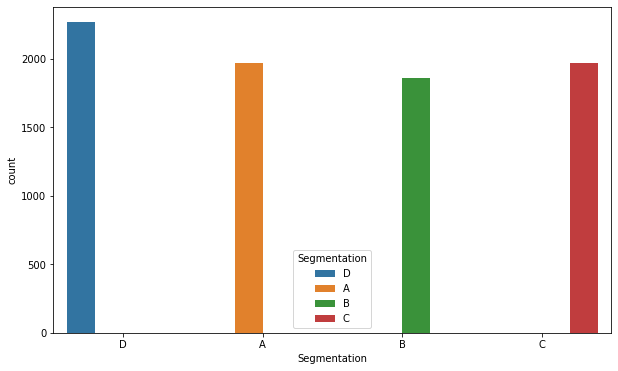

In [23]:
plot_all_grep('segmentation')

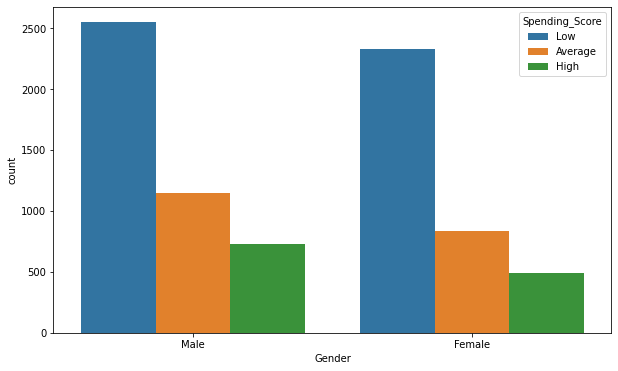

In [24]:
plot_grep(feature='gender', label='spending_score')

In [25]:
train['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

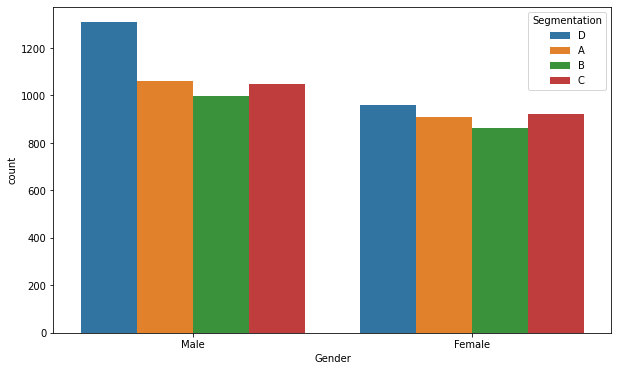

In [26]:
plot_grep('gender')

## Feature engineering and transformation

### Scratch

In [27]:
drop var_1
impute
ohe
scale 

SyntaxError: ignored

### Scaler


In [28]:
scaler = StandardScaler()

### Transform : Impute, OHE, Scale

In [29]:
# impute
train = fill_nan(train)
# ohe
train = ohe(train)
# scale
scaled_array = scaler.fit_transform(train)
# return to df
# cols = train.loc[:, cols]
train = pd.DataFrame(scaled_array, columns=train.columns)
# # display df
train.head()


OHE of Subset:  'train'

Columns Include:
   Gender
   Ever_Married
   Graduated
   Profession
   Work_Experience
   Spending_Score
   Family_Size
   Segmentation

Proceed with OHE?     y/n 

  -->  y

Let's do it!

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation']
...


,Age,train_y_n,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,...,Family_Size_4.0,Family_Size_5.0,Family_Size_6.0,Family_Size_7.0,Family_Size_8.0,Family_Size_9.0,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,-1.284623,0.0,-0.909164,0.909164,1.206653,-1.206653,1.29219,-1.29219,-0.6974,-0.305328,...,2.202411,-0.286499,-0.164273,-0.109737,-0.078968,-0.074051,-0.568763,-0.546987,-0.568381,1.599162
1,-0.327151,0.0,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.6974,-0.305328,...,-0.454048,-0.286499,-0.164273,-0.109737,-0.078968,-0.074051,1.758203,-0.546987,-0.568381,-0.625328
2,1.408268,0.0,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.6974,-0.305328,...,-0.454048,-0.286499,-0.164273,-0.109737,-0.078968,-0.074051,-0.568763,1.828197,-0.568381,-0.625328
3,1.408268,0.0,-0.909164,0.909164,-0.828738,0.828738,-0.77388,0.77388,-0.6974,-0.305328,...,-0.454048,-0.286499,-0.164273,-0.109737,-0.078968,-0.074051,-0.568763,1.828197,-0.568381,-0.625328
4,-0.207467,0.0,1.099912,-1.099912,-0.828738,0.828738,-0.77388,0.77388,-0.6974,-0.305328,...,-0.454048,-0.286499,6.087414,-0.109737,-0.078968,-0.074051,1.758203,-0.546987,-0.568381,-0.625328


## Continued EDA & Data Visualization

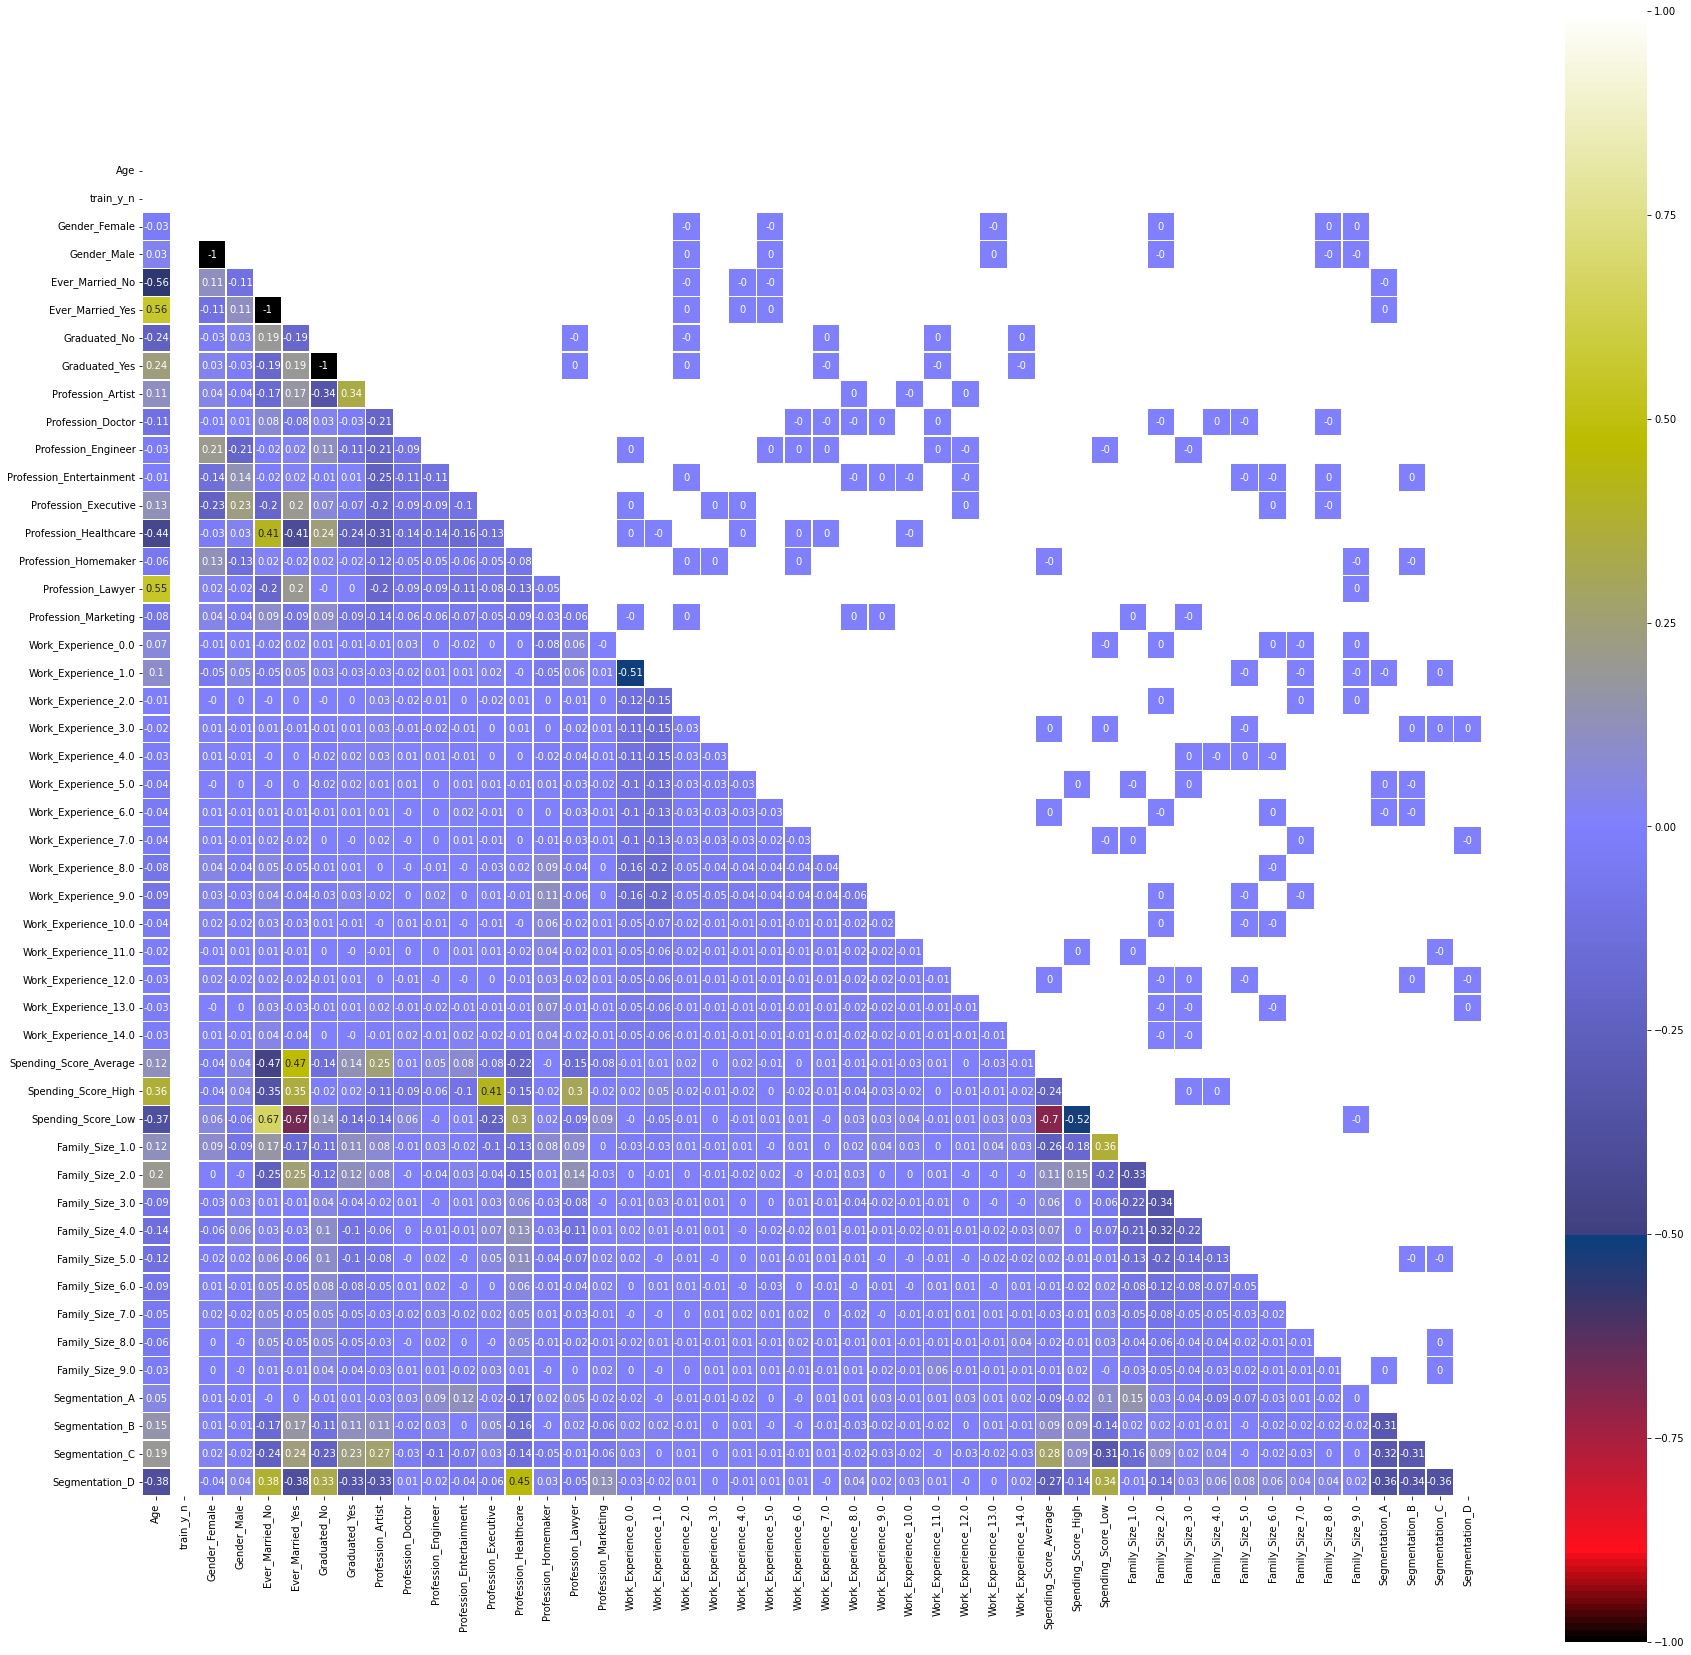

In [30]:
# correlation object
corr= train.corr().round(2)
# getting the Upper Triangle of the co-relation matrix
up_tri = np.triu(corr)

# PLOT
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, vmin=-1, vmax=1,cmap= 'gist_stern',annot=True,linewidth=0.5,square=True, mask=up_tri) #,mask=matrix
plt.show();


In [ ]:
sns.pairplot(train)

---
# 2. Training
---
* Traditional ML Modeling
* Pure Torch Model
* High-level Libraries and Tabular Frameworks

## Traditional ML modeling

In [ ]:
# Your code here

#### Cross Validator ###

In [ ]:
cv = KFold(n_splits = 3, shuffle=True)

## Pure `torch` model

In [ ]:
# Your code here

## High-level libraries and tabular frameworks

In [ ]:
# Your code here

---
# 3. Testing
---
* Model Selection and Test Set Evaluation
* Notes and Findings

## Model selection and test set evaluation

In [ ]:
# Your code here

## Notes and findings

What did you learn?